# Before Funding

- Funding이 시작되기전 주어지는 정보를 이용하여 성공/실패 예측
- 최종 펀딩금액(result)을 예측할 수 있을까? (***OLS***)
- 성공/실패 여부 예측 (***RandomForest, KNN, GaussianNB***)

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import statsmodels.api as sm
import patsy

In [2]:
# Data Load
wadiz_df_original = pd.read_csv('wadiz_df_0329_1.csv', index_col=0)
user_comment = pd.read_csv('user_data_all_0329.csv', index_col=0)
provider_comment = pd.read_csv('provider_data_all_0329.csv', index_col=0)
wadiz_df = pd.read_csv('wadiz_provider_analysis_0329.csv', index_col=0)
provider_comment_grammar = pd.read_csv('comment_analysis.csv', index_col=0)

In [3]:
# grammar null값 제거
wadiz_df = wadiz_df[wadiz_df['provider_grammar_level'].notnull()]
# duration 처리
wadiz_df['date_duration'] = wadiz_df['date_duration'].apply(lambda x: int(x[:-24]))

## 1. Regression
### A. OLS
* Attributes : Duration, Category, Area, Grammar_level, Target(목표펀딩금액)
* 5가지의 변수를 이용하여 최종펀딩금액 예측
* Model : OLS

Category, Area -> OneHotEncoding

In [4]:
x_static = pd.DataFrame([wadiz_df[u'target'],
       wadiz_df['date_duration'],wadiz_df [u'category_label_art/photo/exhibit'],
       wadiz_df['category_label_book/movie'], wadiz_df['category_label_education'],
       wadiz_df['category_label_environment'], wadiz_df['category_label_figure/webtoon'],
       wadiz_df['category_label_game/comics'], wadiz_df['category_label_life/fashion'],
       wadiz_df['category_label_music/concert'], wadiz_df['category_label_share/public'],
       wadiz_df['category_label_sports'], wadiz_df['category_label_tech/design'],
       wadiz_df['category_label_travel'], wadiz_df['category_label_busan'],
       wadiz_df['category_label_chungbuk'], wadiz_df[u'category_label_chungnam'],
       wadiz_df['category_label_deagu'], wadiz_df['category_label_deajeon'],
       wadiz_df['category_label_gwangju'], wadiz_df['category_label_incheon'],
       wadiz_df['category_label_jeju'], wadiz_df['category_label_jeonbuk'],
       wadiz_df['category_label_jeonnam'], wadiz_df['category_label_kangwon'],
       wadiz_df['category_label_kyungbuk'], wadiz_df['category_label_kyungki'],
       wadiz_df['category_label_kyungnam'], wadiz_df['category_label_sejong'],
       wadiz_df['category_label_seoul'], wadiz_df['category_label_ulsan'], wadiz_df['provider_grammar_level']]).T
y = wadiz_df['result']

In [5]:
static_reg_model = sm.OLS(y, x_static).fit()

In [6]:
static_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.943
Date:                Fri, 08 Apr 2016   Prob (F-statistic):            0.00219
Time:                        02:38:47   Log-Likelihood:                -10526.
No. Observations:                 596   AIC:                         2.111e+04
Df Residuals:                     565   BIC:                         2.125e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
target                               0.4105      0.074      5.556      0.000         0.265     0.556
date_duration                     2748.3264   3.03e+04      0.091      0.928     -5.68e+04  6.23e+04
category_label_art/photo/exhibit -9.424e+05   4.18e+06     -0.225      0.822     -9.16e+06  7.27e+06
category_label_book/movie        -5.723e+05   4.03e+06     -0.142      0.887     -8.48e+06  7.33e+06
category_label_education          1.454e+05      4e+06      0.036      0.971     -7.71e+06     8e+06
category_label_environment        7.616e+06   4.26e+06      1.789      0.074     -7.44e+05   1.6e+07
category_label_figure/webtoon     2.247e+06   7.62e+06      0.295      0.768     -1.27e+07  1.72e+07
category_label_game/comics       -2.824e+06   5.69e+06     -0.496      0.620      -1.4e+07  8.36e+06
category_label_life/fashion       3.672e+06   3.77e+06      0.975      0.330     -3.73e+06  1.11e+07
category_label_music/concert      1.279e+06   4.09e+06      0.313      0.755     -6.75e+06  9.31e+06
category_label_share/public        3.21e+05   3.68e+06      0.087      0.930      -6.9e+06  7.55e+06
category_label_sports            -2.905e+06    4.6e+06     -0.631      0.528     -1.19e+07  6.14e+06
category_label_tech/design        1.796e+06   3.81e+06      0.472      0.637     -5.68e+06  9.27e+06
category_label_travel            -1.977e+06   4.58e+06     -0.432      0.666      -1.1e+07  7.01e+06
category_label_busan              1.878e+06   4.71e+06      0.398      0.691     -7.38e+06  1.11e+07
category_label_chungbuk          -1.656e+06   5.81e+06     -0.285      0.776     -1.31e+07  9.76e+06
category_label_chungnam          -2.774e+04   5.55e+06     -0.005      0.996     -1.09e+07  1.09e+07
category_label_deagu             -2.256e+06   5.77e+06     -0.391      0.696     -1.36e+07  9.09e+06
category_label_deajeon            -2.18e+06    6.1e+06     -0.357      0.721     -1.42e+07  9.81e+06
category_label_gwangju            1.909e+06   7.84e+06      0.243      0.808     -1.35e+07  1.73e+07
category_label_incheon            1.179e+05   4.81e+06      0.024      0.980     -9.34e+06  9.57e+06
category_label_jeju              -9.519e+05   1.22e+07     -0.078      0.938      -2.5e+07  2.31e+07
category_label_jeonbuk           -2.594e+06   5.62e+06     -0.462      0.644     -1.36e+07  8.44e+06
category_label_jeonnam            2.531e-06   5.83e-06      0.434      0.664     -8.91e-06   1.4e-05
category_label_kangwon            -8.71e+05   5.47e+06     -0.159      0.874     -1.16e+07  9.88e+06
category_label_kyungbuk          -8.884e+05   5.04e+06     -0.176      0.860     -1.08e+07  9.02e+06
category_label_kyungki           -2.186e+05   3.79e+06     -0.058      0.954     -7.66e+06  7.22e+06
category_label_kyungnam           2.961e+06   6.09e+0

* 너무 많은 카테고리와 OLS모형에 영향을 미치지않는 feature들로 인해 R^2값이 아주 낮음
* 카테고리값 제거 후 재분석

In [7]:
# category, area 제거
x_static_2 = pd.DataFrame([wadiz_df[u'target'], wadiz_df['date_duration'], 
                           wadiz_df['provider_grammar_level']]).T
static_reg_model_2 = sm.OLS(y, x_static_2).fit()
static_reg_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     47.89
Date:                Fri, 08 Apr 2016   Prob (F-statistic):           1.00e-27
Time:                        02:38:47   Log-Likelihood:                -10540.
No. Observations:                 596   AIC:                         2.109e+04
Df Residuals:                     593   BIC:                         2.110e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
target                     0.4451      0.071      6.279      0.000         0.306     0.584
date_duration           3.882e+04   1.97e+04      1.972      0.049       148.569  7.75e+04
provider_grammar_level  8.834e+06   4.52e+06      1.955      0.051     -3.92e+04  1.77e+07
==============================================================================
Omnibus:                      739.038   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71061.903
Skew:                           6.177   Prob(JB):                         0.00
Kurtosis:                      55.048   Cond. No.                     7.79e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*샘플의 개수에 비해 카테고리가 너무 많아 카테고리값들을 제거하여 R^2 값이 올라감.* 
*하지만 grammar_level의 p-value > 0.05 이므로 95%의 신뢰도하에서는 기각됨*

In [8]:
# grammar_level 변수 제거
x_static_3 = pd.DataFrame([wadiz_df['target'], wadiz_df['date_duration']]).T
static_reg_model_3 = sm.OLS(y, x_static_3).fit()
static_reg_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     69.60
Date:                Fri, 08 Apr 2016   Prob (F-statistic):           6.99e-28
Time:                        02:38:47   Log-Likelihood:                -10542.
No. Observations:                 596   AIC:                         2.109e+04
Df Residuals:                     594   BIC:                         2.110e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
target            0.4485      0.071      6.314      0.000         0.309     0.588
date_duration  6.514e+04   1.44e+04      4.521      0.000      3.68e+04  9.34e+04
==============================================================================
Omnibus:                      737.398   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70773.732
Skew:                           6.152   Prob(JB):                         0.00
Kurtosis:                      54.948   Cond. No.                     2.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*R^2 값은 조금 떨어지지만 target과 date_duration은 result값 예측 모형에 영향을 미침*

In [9]:
#date_duration만 사용하였을때
x_static_4 = pd.DataFrame([wadiz_df['date_duration']]).T
static_reg_model_4 = sm.OLS(y, x_static_4).fit()
static_reg_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     93.23
Date:                Fri, 08 Apr 2016   Prob (F-statistic):           1.37e-20
Time:                        02:38:47   Log-Likelihood:                -10561.
No. Observations:                 596   AIC:                         2.112e+04
Df Residuals:                     595   BIC:                         2.113e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
date_duration  1.175e+05   1.22e+04      9.656      0.000      9.36e+04  1.41e+05
==============================================================================
Omnibus:                      738.061   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65048.389
Skew:                           6.208   Prob(JB):                         0.00
Kurtosis:                      52.651   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#date_duration만 사용하였을때
x_static_5 = pd.DataFrame([wadiz_df['target']]).T
static_reg_model_5 = sm.OLS(y, x_static_5).fit()
static_reg_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     115.0
Date:                Fri, 08 Apr 2016   Prob (F-statistic):           1.19e-24
Time:                        02:38:47   Log-Likelihood:                -10552.
No. Observations:                 596   AIC:                         2.111e+04
Df Residuals:                     595   BIC:                         2.111e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
target         0.6332      0.059     10.724      0.000         0.517     0.749
==============================================================================
Omnibus:                      705.196   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66301.775
Skew:                           5.668   Prob(JB):                         0.00
Kurtosis:                      53.412   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 결국 Target과 Date_duration 변수 2개를 사용한 OLS모형이 최적의 모형임.

### B. Outlier Test
* Outlier들이 결과값에 너무 큰 영향을 미치면 모형에 왜곡이 생기므로 제거해주어야됨.
* model_3(target, date_duration)을 이용하여 outlier test

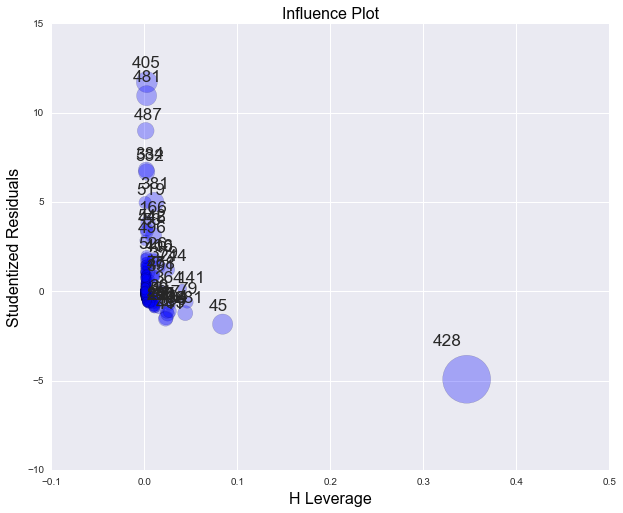

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sm.graphics.influence_plot(static_reg_model_3, plot_alpha=0.3, ax=ax)
plt.show()

In [12]:
outlier_index = static_reg_model_3.outlier_test()[static_reg_model_3.outlier_test().ix[:, -1].abs() < 0.01].index

In [13]:
#outlier test 결과값
static_reg_model_3.outlier_test()[static_reg_model_3.outlier_test().ix[:, -1] < 0.01]

,student_resid,unadj_p,bonf(p)
381,4.995387,7.735568e-07,4.610398e-04
384,6.788720,2.751223e-11,1.639729e-08
405,11.713978,1.181186e-28,7.039870e-26
428,-4.929691,1.070441e-06,6.379828e-04
481,10.951623,1.512165e-25,9.012504e-23
487,8.986409,3.392018e-18,2.021643e-15
519,4.965625,8.966005e-07,5.343739e-04
532,6.674278,5.713561e-11,3.405283e-08


In [14]:
wadiz_outlier = wadiz_df.loc[outlier_index]
wadiz_no_outlier = wadiz_df.drop(outlier_index)

In [15]:
#outlier project
wadiz_outlier.iloc[:, :6]

,project_id,title,area,category,target,result
381,2344.0,비긴어게인 영철버거 프로젝트,seoul,share/public,20000000.0,68115000.0
384,2383.0,스마트카라로 음식물쓰레기 10톤 줄이기!,seoul,environment,7524000.0,82251600.0
405,2621.0,랩노쉬 : 삼시세끼 사수 프로젝트,seoul,life/fashion,10000000.0,129962300.0
428,2876.0,EarWatch_불편했던 블루투스 핸즈프리!!! 이젠 손목에 보관하세요.,kyungki,tech/design,100000000.0,1350000.0
481,3480.0,가장 편리한 여행을 위한 멀티 백팩 :TOM,seoul,life/fashion,10000000.0,122645000.0
487,3510.0,앵콜! 스마트카라로 음식물쓰레기 10톤 줄이기,kyungki,environment,7524000.0,103454000.0
519,3914.0,"완전한 미래식사, 밀스 프로젝트",seoul,life/fashion,3000000.0,59920000.0
532,4035.0,귀욤폭발! 라인프렌즈 공기청정기,seoul,life/fashion,10000000.0,81436000.0


In [16]:
wadiz_outlier['funding_rate']

381     3.405750
384    10.931898
405    12.996230
428     0.013500
481    12.264500
487    13.749867
519    19.973333
532     8.143600
Name: funding_rate, dtype: float64

***outlier들은 funding_rate값이 너무 높거나 너무 낮은 projects들임***

In [17]:
# OLS
x_static_3_no_outlier = pd.DataFrame([wadiz_no_outlier['target'], wadiz_no_outlier['date_duration']]).T
y_no_outlier = wadiz_no_outlier['result']
no_outlier_model = sm.OLS(y_no_outlier, x_static_3_no_outlier).fit()
no_outlier_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     176.2
Date:                Fri, 08 Apr 2016   Prob (F-statistic):           1.19e-60
Time:                        02:38:50   Log-Likelihood:                -10022.
No. Observations:                 588   AIC:                         2.005e+04
Df Residuals:                     586   BIC:                         2.006e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
target            0.5023      0.047     10.755      0.000         0.411     0.594
date_duration  3.948e+04   8134.610      4.853      0.000      2.35e+04  5.55e+04
==============================================================================
Omnibus:                      400.338   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6276.959
Skew:                           2.802   Prob(JB):                         0.00
Kurtosis:                      17.993   Cond. No.                     2.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### outlier 제거 결과 R^2 0.373으로 대폭 상승

### B. OLS Model prediction

Attributes : Target, Duration

In [18]:
reg_predict = no_outlier_model.predict(x_static_3_no_outlier)

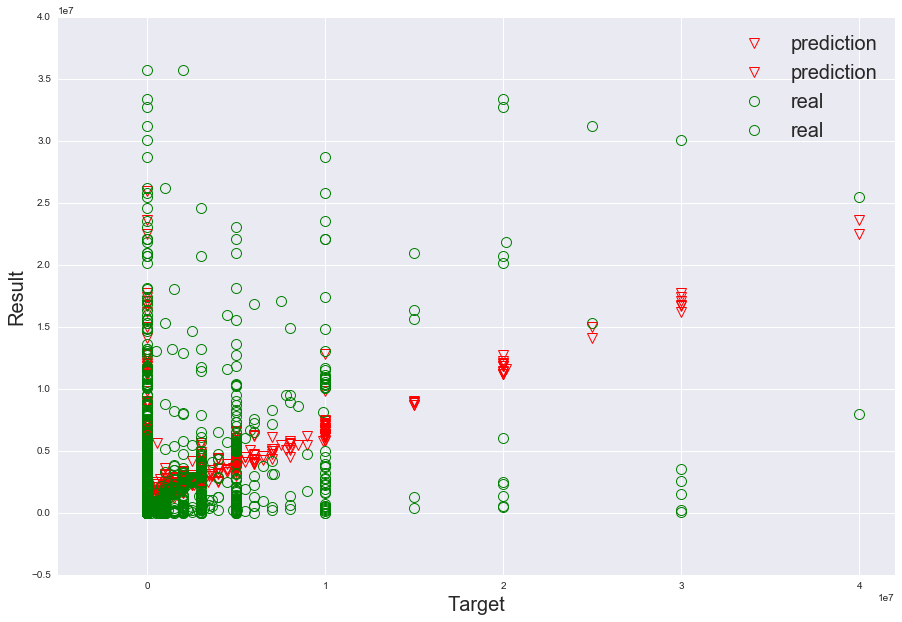

In [19]:
plt.figure(figsize = (15,10));
plt.plot(x_static_3_no_outlier, reg_predict, 'v', markersize=10, markeredgewidth=1
         , markeredgecolor='r', markerfacecolor='None', label = 'prediction');
plt.plot(x_static_3_no_outlier, y_no_outlier, 'o', markersize=10, markeredgewidth=1
         , markeredgecolor='g', markerfacecolor='None', label = 'real', );
plt.legend(fontsize=20);
plt.xlabel('Target', fontsize=20);
plt.ylabel('Result', fontsize=20);
plt.xlim(-5000000, 42000000);
plt.ylim(-5000000, 40000000);

## #Result
### - OLS 모형에서 가장 중요한 Feature는 Target과 Date duration이다.
### - Date_duration의 경우 coef가 (+)로 펀딩기간이 길수록 펀딩금액이 많이진다는 가정 확인.
### - grammar_level은 전체 금액을 예측하는 모형에서는 영향을 미치지 않는다.

## 2. Classification
* regression의 결과값이 너무 낮음 -> 그렇다면 성공/실패 예측을 위한 모형에서는 어떤 결과를 가져올까?
* regression 모델에서 확인한 outlier들을 제거한 상태에서 분석
* Attributes = Target, Duration, Grammar_level
* Class = Success(1), Fail(0)
* Models = RandomForest, KNN, NaiveBayes

In [20]:
x_classification = pd.DataFrame([wadiz_no_outlier['target'], wadiz_no_outlier['date_duration'], wadiz_no_outlier['provider_grammar_level']]).T
y = wadiz_no_outlier['success']

### A. RandomForest

In [21]:
re = RandomForestClassifier()

In [22]:
x_re_list_1 = []
y_re_list_1 = []

for i in range(1, 20):
    re_1 = RandomForestClassifier(n_estimators=i)
    score = cross_val_score(re_1, x_classification, y, cv=10).mean()
    x_re_list_1.append(i)
    y_re_list_1.append(score)

base_success_rate : 51.7 %
max_accuracy : 55.8 %


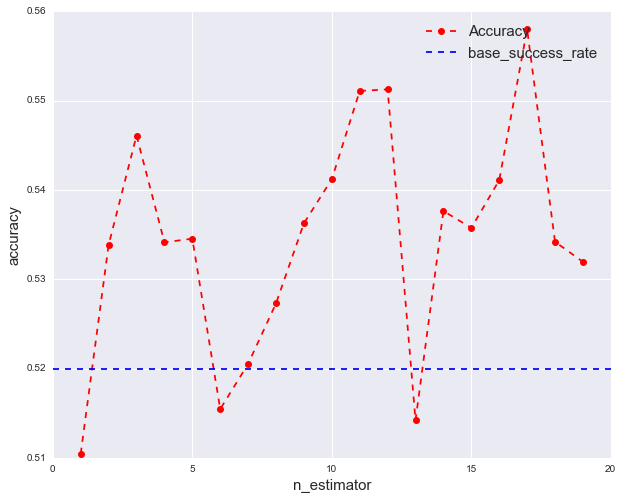

In [23]:
base_success_rate = round((y.value_counts()[1] / len(y)), 2)
figure = plt.figure(figsize=(10,8))
plt.plot(x_re_list_1, y_re_list_1, 'o--', c = 'r', label = 'Accuracy')
plt.axhline(base_success_rate, ls = '--', label = 'base_success_rate')
plt.legend(fontsize=15)
plt.xlabel('n_estimator', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
print('base_success_rate :', round((y.value_counts()[1] / len(y))*100, 2), '%')
print('max_accuracy :', round(max(y_re_list_1)*100, 2), '%')

* RandomForest 결과 최고 정확도는 55.97%

### B. Grid Search

In [24]:
from sklearn.grid_search import GridSearchCV

In [25]:
# Gridsearch report를 위한 함수 생성
from operator import itemgetter
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

In [26]:
#parameter 설정
param_grid = {"max_depth": [5, 10, None],
              "max_features": [1, 2, None],
              "min_samples_split": [1, 3, 5],
              "min_samples_leaf": [1, 3, 5, 10],
              "n_estimators" : np.arange(3, 20)}

# run grid search
grid_search = GridSearchCV(re, param_grid=param_grid)
grid_search.fit(x_classification, y)

report(grid_search.grid_scores_)

Model with rank: 1
Mean validation score: 0.616 (std: 0.023)
Parameters: {'min_samples_leaf': 5, 'max_depth': 5, 'n_estimators': 8, 'max_features': 2, 'min_samples_split': 1}

Model with rank: 2
Mean validation score: 0.607 (std: 0.029)
Parameters: {'min_samples_leaf': 1, 'max_depth': 5, 'n_estimators': 7, 'max_features': 1, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.605 (std: 0.031)
Parameters: {'min_samples_leaf': 10, 'max_depth': 5, 'n_estimators': 5, 'max_features': None, 'min_samples_split': 3}



* **Grid Search 결과에 따라 최고 Score를 기록한 parameter로 재설정**

### C. Cross Validation

In [27]:
best_re = RandomForestClassifier(max_features=2, min_samples_split=1, n_estimators=15, max_depth=5, min_samples_leaf=10)

In [28]:
Stkfold = StratifiedKFold(y, n_folds=10)

In [29]:
print('Mean of Score :', np.mean(cross_val_score(best_re, x_classification, y, cv = Stkfold))),
print('Std of Score :', np.std(cross_val_score(best_re, x_classification, y, cv = Stkfold)))

Mean of Score : 0.585114942529
Std of Score : 0.0365757981156


In [30]:
best_re.fit(x_classification, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=2, max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
# feature importance
feature_importance = pd.DataFrame([best_re.feature_importances_], columns=x_classification.columns, index=['Importance']).T
feature_importance

,Importance
target,0.259042
date_duration,0.220541
provider_grammar_level,0.520417


### #RandomForest 결과
* RandomForest의 score는 약 57%로 향상된 모델로 보이나 표준편차가 6%로 결국 전체 분포는 Base_line인 52%에서 크게 벗어나지 못함.
* Feature Importance를 살펴본 결과 OLS 모형에서 가장 주효했던 target과 date_duration보다 grammar_level이 더 높은 중요도를 보임

### D. KNN

In [32]:
knn = KNeighborsClassifier()

In [33]:
knn_model = knn.fit(x_classification, y)

In [34]:
Stkfold = StratifiedKFold(y, n_folds=10)

In [35]:
knn_model = knn.fit(x_classification, y)
knn_best_score_mean = cross_val_score(knn_model, x_classification, y, cv = 10).mean()
knn_best_score_std = cross_val_score(knn_model, x_classification, y, cv = 10).std()
print('KNN Best Score :', knn_best_score_mean),
print('KNN Best Score(Standard Error) :', knn_best_score_std)

KNN Best Score : 0.493448275862
KNN Best Score(Standard Error) : 0.0496274933498


??????? 너무 낮은 결과가 나옴.

무엇인가가 잘못되었다는 것을 의미.

**feature들을 재선택하여 분석**

In [36]:
# target 제거
x_knn_1 = pd.DataFrame([wadiz_no_outlier['date_duration'], wadiz_no_outlier['provider_grammar_level']]).T
y_knn_1 = wadiz_no_outlier['success']
knn_model_1 = knn.fit(x_knn_1, y_knn_1)
knn_best_score_mean_1 = cross_val_score(knn_model_1, x_knn_1, y_knn_1, cv = 10).mean()
knn_best_score_std_1 = cross_val_score(knn_model_1, x_knn_1, y_knn_1, cv = 10).std()
print('KNN Best Score :', knn_best_score_mean_1),
print('KNN Best Score(Standard Error) :', knn_best_score_std_1)

KNN Best Score : 0.491609195402
KNN Best Score(Standard Error) : 0.0480847338595


In [37]:
# grammar_level 제거
x_knn_2 = pd.DataFrame([wadiz_no_outlier['target'], wadiz_no_outlier['date_duration']]).T
y_knn_2 = wadiz_no_outlier['success']
knn_model_2 = knn.fit(x_knn_2, y_knn_2)
knn_best_score_mean_2 = cross_val_score(knn_model_2, x_knn_2, y_knn_2, cv = 10).mean()
knn_best_score_std_2 = cross_val_score(knn_model_2, x_knn_2, y_knn_2, cv = 10).std()
print('KNN Best Score :', knn_best_score_mean_2),
print('KNN Best Score(Standard Error) :', knn_best_score_std_2)

KNN Best Score : 0.471781609195
KNN Best Score(Standard Error) : 0.0719706611075


In [38]:
# date_duration 제거
x_knn_3 = pd.DataFrame([wadiz_no_outlier['target'], wadiz_no_outlier['provider_grammar_level']]).T
y_knn_3 = wadiz_no_outlier['success']
knn_model_3 = knn.fit(x_knn_3, y_knn_3)
knn_best_score_mean_3 = cross_val_score(knn_model_3, x_knn_3, y_knn_3, cv = 10).mean()
knn_best_score_std_3 = cross_val_score(knn_model_3, x_knn_3, y_knn_3, cv = 10).std()
print('KNN Best Score :', knn_best_score_mean_3),
print('KNN Best Score(Standard Error) :', knn_best_score_std_3)

KNN Best Score : 0.547701149425
KNN Best Score(Standard Error) : 0.0436781609195


###  #KNN 결과
* grammar_level과 target만 이용하였을 때 가장 높은 score를 보임. 하지만 아주 낮은 accuracy로 의미없는 모델임.

### C. NaiveBayes

In [39]:
gnb = GaussianNB()

In [40]:
gnb_best_score_mean = cross_val_score(gnb, x_classification, y, cv=Stkfold).mean()
gnb_best_score_std = cross_val_score(gnb, x_classification, y, cv=Stkfold).std()

In [41]:
print('GNB Best Score :', gnb_best_score_mean),
print('GNB Best Score(Standard Error) :', gnb_best_score_std)

GNB Best Score : 0.534022988506
GNB Best Score(Standard Error) : 0.0498761843902


### #NaiveBayes 결과
* 마찬가지로 성능이 좋지않음

# # Insight
* Regression 모델에서 가장 중요하게 여겨졌던 feature와 RandomForest에서 중요하게 여겨지는 feature가 상이함. -> (OLS : Target, RandomForest : grammar_level)
* 대표적인 classification 방법론인 RandomForest, KNN, GaussianNB에서 base-line을 넘는 성능을 보이지 못함.
* 샘플의 수가 작고(588개) 사용가능한 feature의 수도 한정적인 것이 낮은 성능의 가장 큰 이유임.

* ***Project가 시작되기전 갖는 정보들로는 성공예측이 어려움.***